In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.9.1


(60000, 28, 28)
(10000, 28, 28)
5


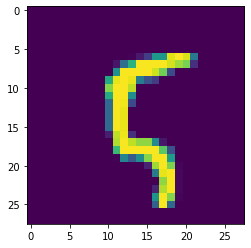

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

plt.imshow(x_train[100])
print(y_train[100])

c:\Users\krzyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

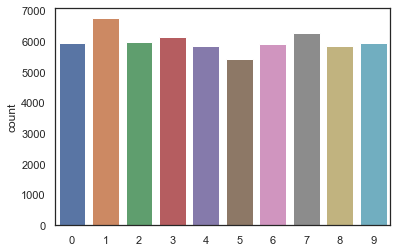

In [4]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

sns.countplot(y_train)

In [5]:
input_shape = (28, 28, 1)

print(x_train.shape[0], x_train.shape[1], x_train.shape[2])

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

60000 28 28


In [6]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


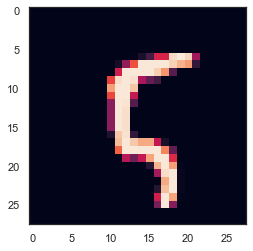

In [7]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [8]:
batch_size = 64
num_classes = 10
epochs = 5

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [11]:
from keras.utils import to_categorical, plot_model

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [13]:
hist = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 195s 230ms/step - loss: 0.2134 - acc: 0.9335 - val_loss: 0.0393 - val_acc: 0.9885
Epoch 2/5
844/844 [==============================] - 185s 219ms/step - loss: 0.0741 - acc: 0.9789 - val_loss: 0.0352 - val_acc: 0.9897
Epoch 3/5
844/844 [==============================] - 195s 231ms/step - loss: 0.0603 - acc: 0.9832 - val_loss: 0.0362 - val_acc: 0.9907
Epoch 4/5
844/844 [==============================] - 175s 207ms/step - loss: 0.0500 - acc: 0.9862 - val_loss: 0.0310 - val_acc: 0.9930
Epoch 5/5
844/844 [==============================] - 173s 205ms/step - loss: 0.0524 - acc: 0.9863 - val_loss: 0.0439 - val_acc: 0.9903


In [15]:
print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

[0.21337170898914337, 0.07410211116075516, 0.06026467680931091, 0.050034672021865845, 0.05244392156600952]
[0.9334999918937683, 0.9788888692855835, 0.9832407236099243, 0.9862037301063538, 0.9862592816352844]
[0.039348118007183075, 0.03518258035182953, 0.03618448227643967, 0.03096669539809227, 0.04391327500343323]
[0.9884999990463257, 0.9896666407585144, 0.9906666874885559, 0.9929999709129333, 0.9903333187103271]


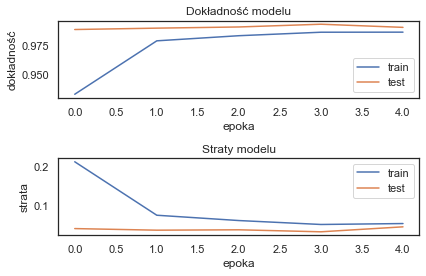

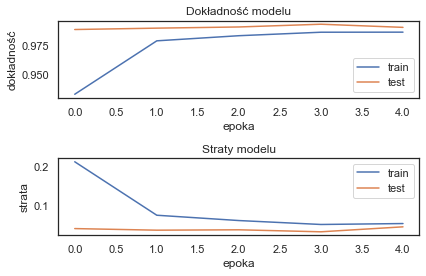

In [16]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Dokładność modelu')
plt.ylabel('dokładność')
plt.xlabel('epoka')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Straty modelu')
plt.ylabel('strata')
plt.xlabel('epoka')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.savefig('my_plot.png')

fig

In [18]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 6s 18ms/step


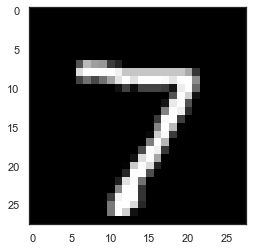

(28, 28, 1)


In [21]:
plt.imshow(x_test[0], cmap='gray')
plt.show()
print(x_test[0].shape)

In [22]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


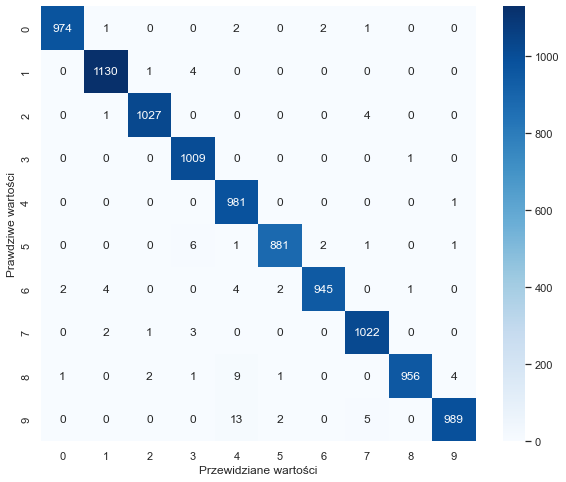

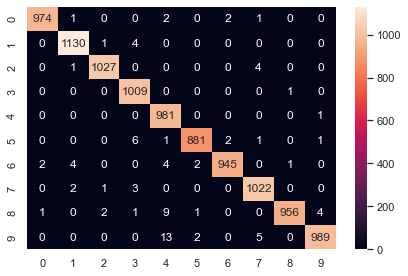

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, square=True, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Przewidziane wartości')
plt.ylabel('Prawdziwe wartości');
plt.show();

sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.tight_layout()
plt.savefig('my_conf_mat.png')